In [28]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd 
import time

# Initialize the WebDriver (if not already initialized)
if 'driver' not in globals():
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Function to check if the WebDriver session is valid
def is_session_valid(driver):
    try:
        # Try to get the current URL to check if the session is valid
        driver.current_url
        return True
    except Exception:
        # If an exception occurs, the session is invalid
        return False

# Reinitialize the WebDriver session if it is invalid
if not is_session_valid(driver):
    driver.quit()  # Close the invalid session
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Navigate to the page
page_url = "https://harrypotter.fandom.com/wiki/Category:Character_indexes"  # Replace with your target URL
driver.get(page_url)
driver.implicitly_wait(10)
# Perform the action (e.g., clicking the "ACCEPT" button)
try:
    accept_button = driver.find_element(By.XPATH, '//div[text()="ACCEPT"]')
    accept_button.click()
    driver.implicitly_wait(10)
    print(driver.title)
    driver.close()
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[text()="ACCEPT"]"}
  (Session info: chrome=138.0.7204.49); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x714553+62419]
	GetHandleVerifier [0x0x714594+62484]
	(No symbol) [0x0x552133]
	(No symbol) [0x0x59a8fe]
	(No symbol) [0x0x59ac9b]
	(No symbol) [0x0x5e3052]
	(No symbol) [0x0x5bf4b4]
	(No symbol) [0x0x5e087a]
	(No symbol) [0x0x5bf266]
	(No symbol) [0x0x58e852]
	(No symbol) [0x0x58f6f4]
	GetHandleVerifier [0x0x984833+2619059]
	GetHandleVerifier [0x0x97fc4a+2599626]
	GetHandleVerifier [0x0x73b0fa+221050]
	GetHandleVerifier [0x0x72b378+156152]
	GetHandleVerifier [0x0x731d2d+183213]
	GetHandleVerifier [0x0x71c438+94904]
	GetHandleVerifier [0x0x71c5c2+95298]
	GetHandleVerifier [0x0x70771a+9626]
	BaseThreadInitThunk [0x0x76517ba9+25]
	RtlInitializeExce

In [29]:
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link') 

In [30]:
for i in book_categories:
    print(i.text)
    print(i.get_attribute('href'))

Harry Potter and the Chamber of Secrets (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Chamber_of_Secrets_(character_index)
Harry Potter and the Deathly Hallows (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Deathly_Hallows_(character_index)
Harry Potter and the Goblet of Fire (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Goblet_of_Fire_(character_index)
Harry Potter and the Half-Blood Prince (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Half-Blood_Prince_(character_index)
Harry Potter and the Order of the Phoenix (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Order_of_the_Phoenix_(character_index)
Harry Potter and the Philosopher's Stone (character index)
https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone_(character_index)
Harry Potter and the Prisoner of Azkaban (character index)
https://harrypotter.fandom.com/wiki/H

In [ ]:

books = []
for category in book_categories: 
    book_name = category.text
    book_url = category.get_attribute('href')
    books.append({"book_name": book_name, "book_url": book_url})

In [32]:
books

[{'book_name': 'Harry Potter and the Chamber of Secrets (character index)',
  'book_url': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Chamber_of_Secrets_(character_index)'},
 {'book_name': 'Harry Potter and the Deathly Hallows (character index)',
  'book_url': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Deathly_Hallows_(character_index)'},
 {'book_name': 'Harry Potter and the Goblet of Fire (character index)',
  'book_url': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Goblet_of_Fire_(character_index)'},
 {'book_name': 'Harry Potter and the Half-Blood Prince (character index)',
  'book_url': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Half-Blood_Prince_(character_index)'},
 {'book_name': 'Harry Potter and the Order of the Phoenix (character index)',
  'book_url': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Order_of_the_Phoenix_(character_index)'},
 {'book_name': "Harry Potter and the Philosopher's Stone (character inde

In [ ]:
# character_list = []
# for book in books:
#     driver.get(book['book_url'])
#     char_elements = driver.find_elements(By.CLASS_NAME, 'mw-parser-output')
#     for element in char_elements:    
#         character_dict = dict()
#         tables = element.find_elements(By.TAG_NAME, 'table')
#         lists = element.find_elements(By.TAG_NAME, 'ul')
#         for chapter in tables:
#             characters = chapter.find_elements(By.TAG_NAME, 'a')
#             for character in characters:
#                 title = character.get_attribute('title')
#                 href = character.get_attribute('href')
#                 if '/wiki/' in href and not href.startswith('https://static.'):  # Filter out images
#                     character_list.append({'book':book['book_name'], 'title': title})
#         if title is None:    
#             for chap in lists:
#                 chars = chap.find_elements(By.TAG_NAME, 'li')
#                 for char in chars:
#                     titl = char.get_attribute('title')
#                     character_list.append({'book':book['book_name'], 'title': titl})

In [51]:
character_lis = []

for book in books:
    try:
        driver.get(book['book_url'])
        time.sleep(2)  # optional delay for polite scraping
    except Exception as e:
        print(f"Error loading {book['book_url']}: {e}")
        continue

    # Extract from tables
    tables = driver.find_elements(By.CSS_SELECTOR, 'table.article-table')
    for table in tables:
        links = table.find_elements(By.TAG_NAME, 'a')
        for link in links:
            title = link.get_attribute('title')
            if title:
                character_lis.append({'book': book['book_name'], 'title': title})

    # Extract from unordered lists
    lists = driver.find_elements(By.TAG_NAME, 'ul')
    for ul in lists:
        list_items = ul.find_elements(By.TAG_NAME, 'li')
        for li in list_items:
            # First: look for <a> inside <li>
            a_tags = li.find_elements(By.TAG_NAME, 'a')
            if a_tags:
                for a in a_tags:
                    title = a.get_attribute('title') or a.text
                    if title:
                        character_lis.append({'book': book['book_name'], 'title': title})
            else:
                # No <a> inside <li> → just plain text
                plain_text = li.text.strip()
                if plain_text:
                    character_lis.append({'book': book['book_name'], 'title': plain_text})


In [53]:
df = pd.DataFrame(character_lis)

In [70]:
import re
#remove ( and ) from book names
df['book'] = df['book'].str.replace(r'\(.*?\)', '', regex=True).str.strip()
# Drop rows where title is null or empty
df = df[df['title'].notnull() & (df['title'].str.strip() != '')]

# Drop rows containing unwanted words (case-insensitive)
unwanted_keywords = ['sitemap', 'help', 'chapter', 'character index', 'category', 'categories', 'see also', 'fandom', 'fantasy', 'fanatical', 'about', 'careers', 'press', 'contact', 'terms of use', 'privacy policy', 'cookies', 'community', 'digital services', 'support', 'media kit', '220']
pattern = '|'.join(unwanted_keywords)
df = df[~df['title'].str.lower().str.contains(pattern)]
#Drop rows that contain numbers
df = df[~df['title'].str.contains(r'\d', na=False)]
# Drop rows where title is fully uppercase
df = df[~df['title'].str.match(r'^[A-Z\s]+$')]
# Remove rows where the book name is part of the title (case-insensitive)
df = df[~df.apply(lambda row: row['book'].lower() in row['title'].lower(), axis=1)]


In [71]:
df.to_csv('harry_potter_characters.csv', index=False)

<Axes: title={'center': 'Number of Characters per Book'}, xlabel='book'>

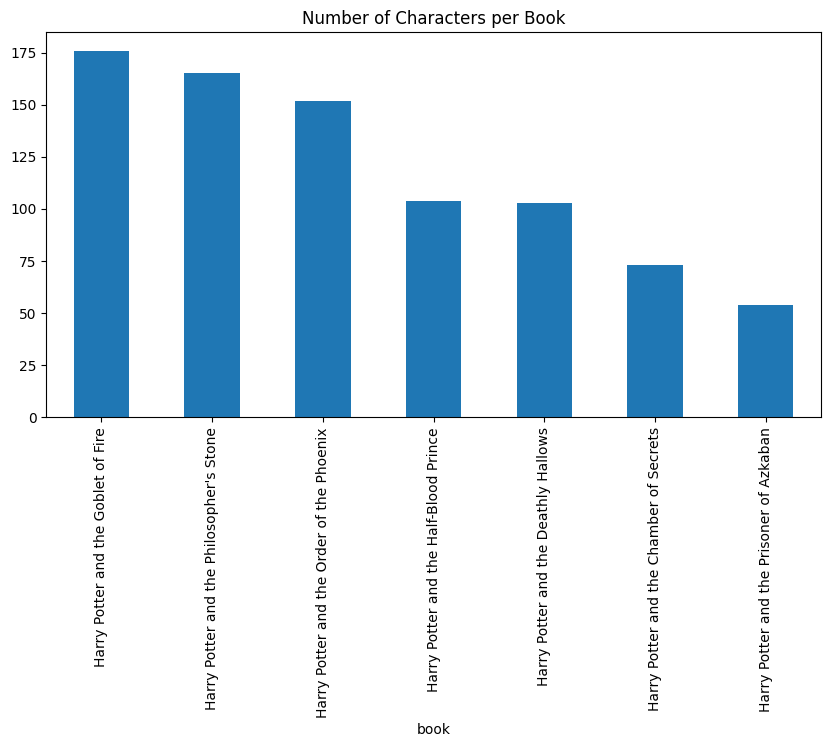

In [68]:
df['book'].value_counts().plot(kind='bar', figsize=(10, 5), title='Number of Characters per Book')